# Example: REV analysis for permeability

This example demonstrates how to perform REV analysis for permeability, calculated using FDMSS solver.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import Permeability

In [2]:
#metric and analyzer inizialization. 

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = 300 #image linear size. Note, that only cubical images can be analyzed. 
cut_step = 50 # increment step of subcube size
sREV_max_size = 200 #maximal subcube size for which sREV analysis is performed.
datadir = 'data' # path to the folder containing image, default: None
outputdir = 'output' # path to the output folder containing generated data, default: 'output'
direction = 'z' #could be 'x', 'y', 'z' or 'all'. If label of this parameter is 'all', permeability values are
                 #generated for all 3 possible flow directions.
n_threads = 32 #number of CPU cores used by FDMSS, default: 1
resolution = 1. #resolution of studied sample (micrometers), default: 1.
show_time = True #default: False. Added to monitor time cost for large images.
metric = Permeability(direction = direction, n_threads = n_threads, resolution = resolution, show_time = show_time)
analyzer = REVAnalyzer(metric = metric, image = image, cut_step = cut_step, sREV_max_size = sREV_max_size,
                       datadir = datadir, outputdir = outputdir)

In [3]:
# metric generation
analyzer.generate()

In [4]:
#Check out if we can read the data generated by external generator.
cut_size = 50
cut_id = 0
value = analyzer.read(cut_size, cut_id)
print(value)

6.074353061920256


In [5]:
#fix thresholds and analyze generated data
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

In [6]:
#get mean, std and normed std values for different cut sizes
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)

{300: 3.1556134901172768, 50: 2.662257055198176, 100: 2.8447237303437864, 150: 3.241180032437375, 200: 3.352799162257338, 250: 3.7126688972602433}
{50: 3.312899790268268, 100: 0.6019639740917918, 150: 0.5716661688356718, 200: 0.31320613862254093}
{50: 1.2443951585365067, 100: 0.2116071826837976, 150: 0.1763759381196044, 200: 0.0934163137918672}
150
50
50


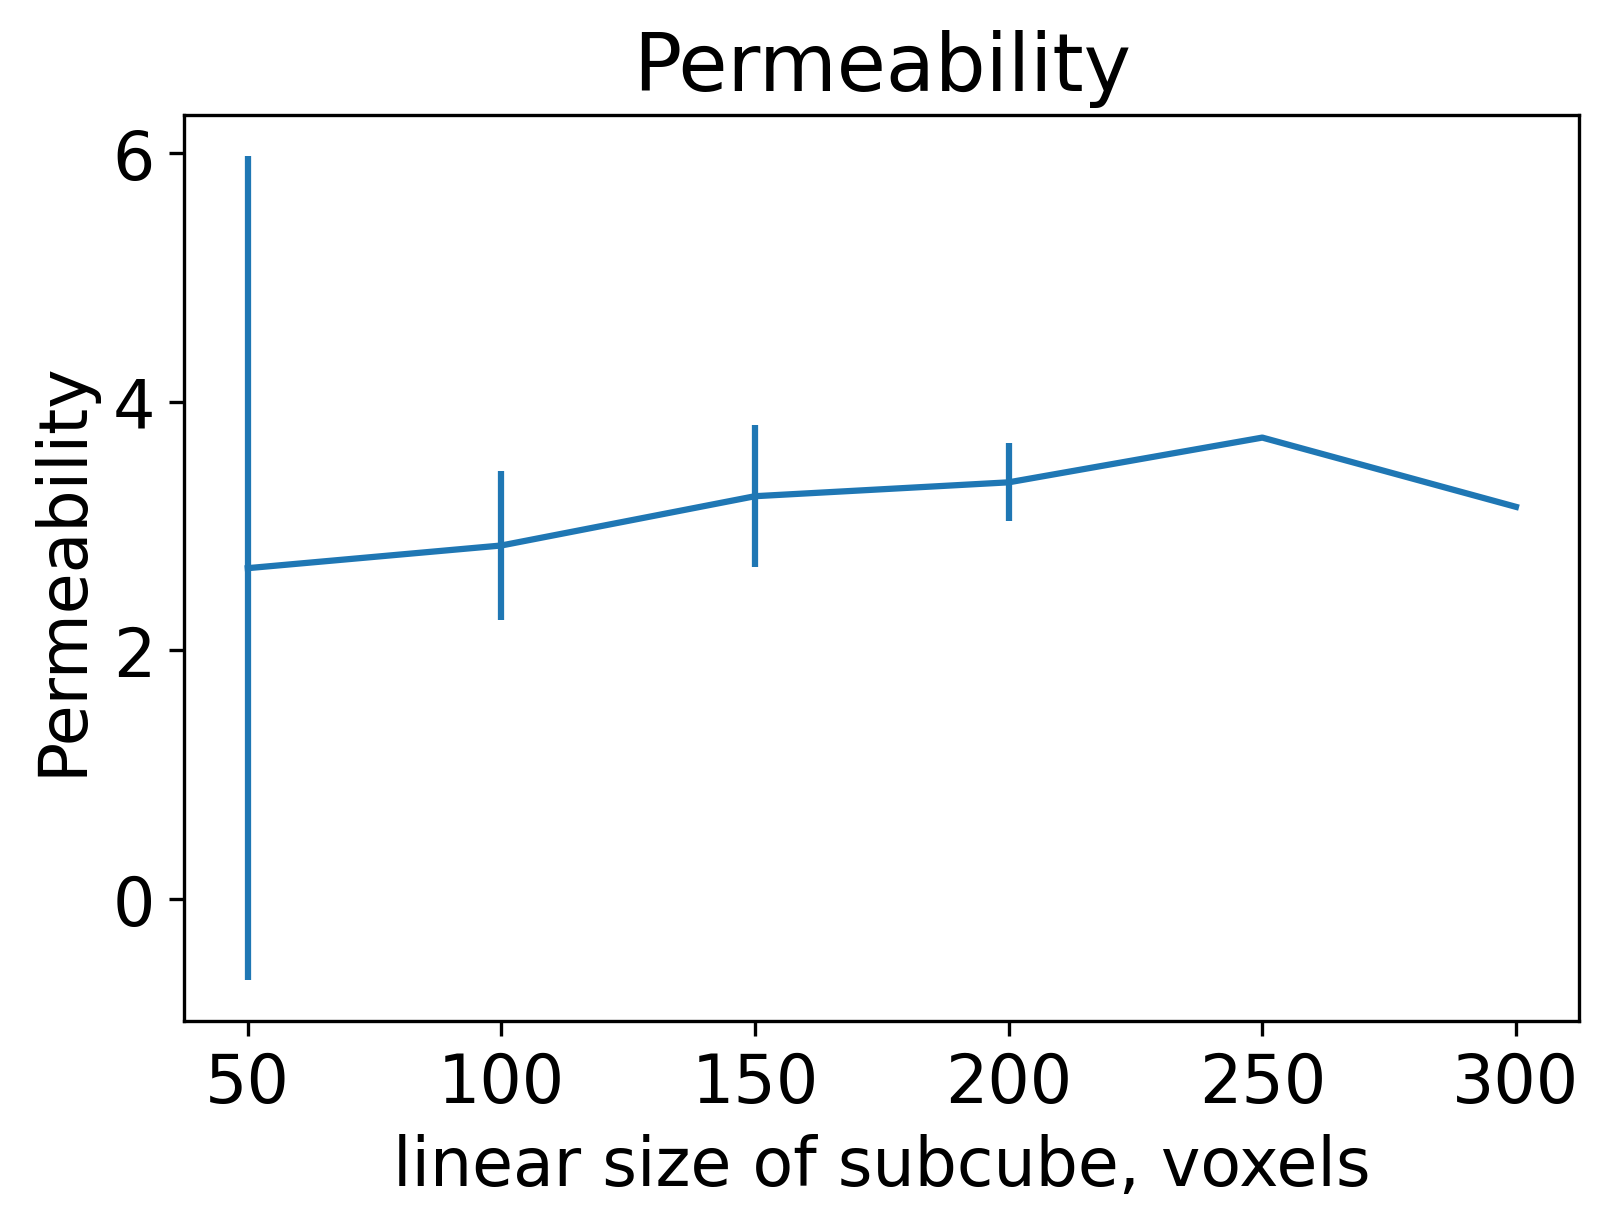

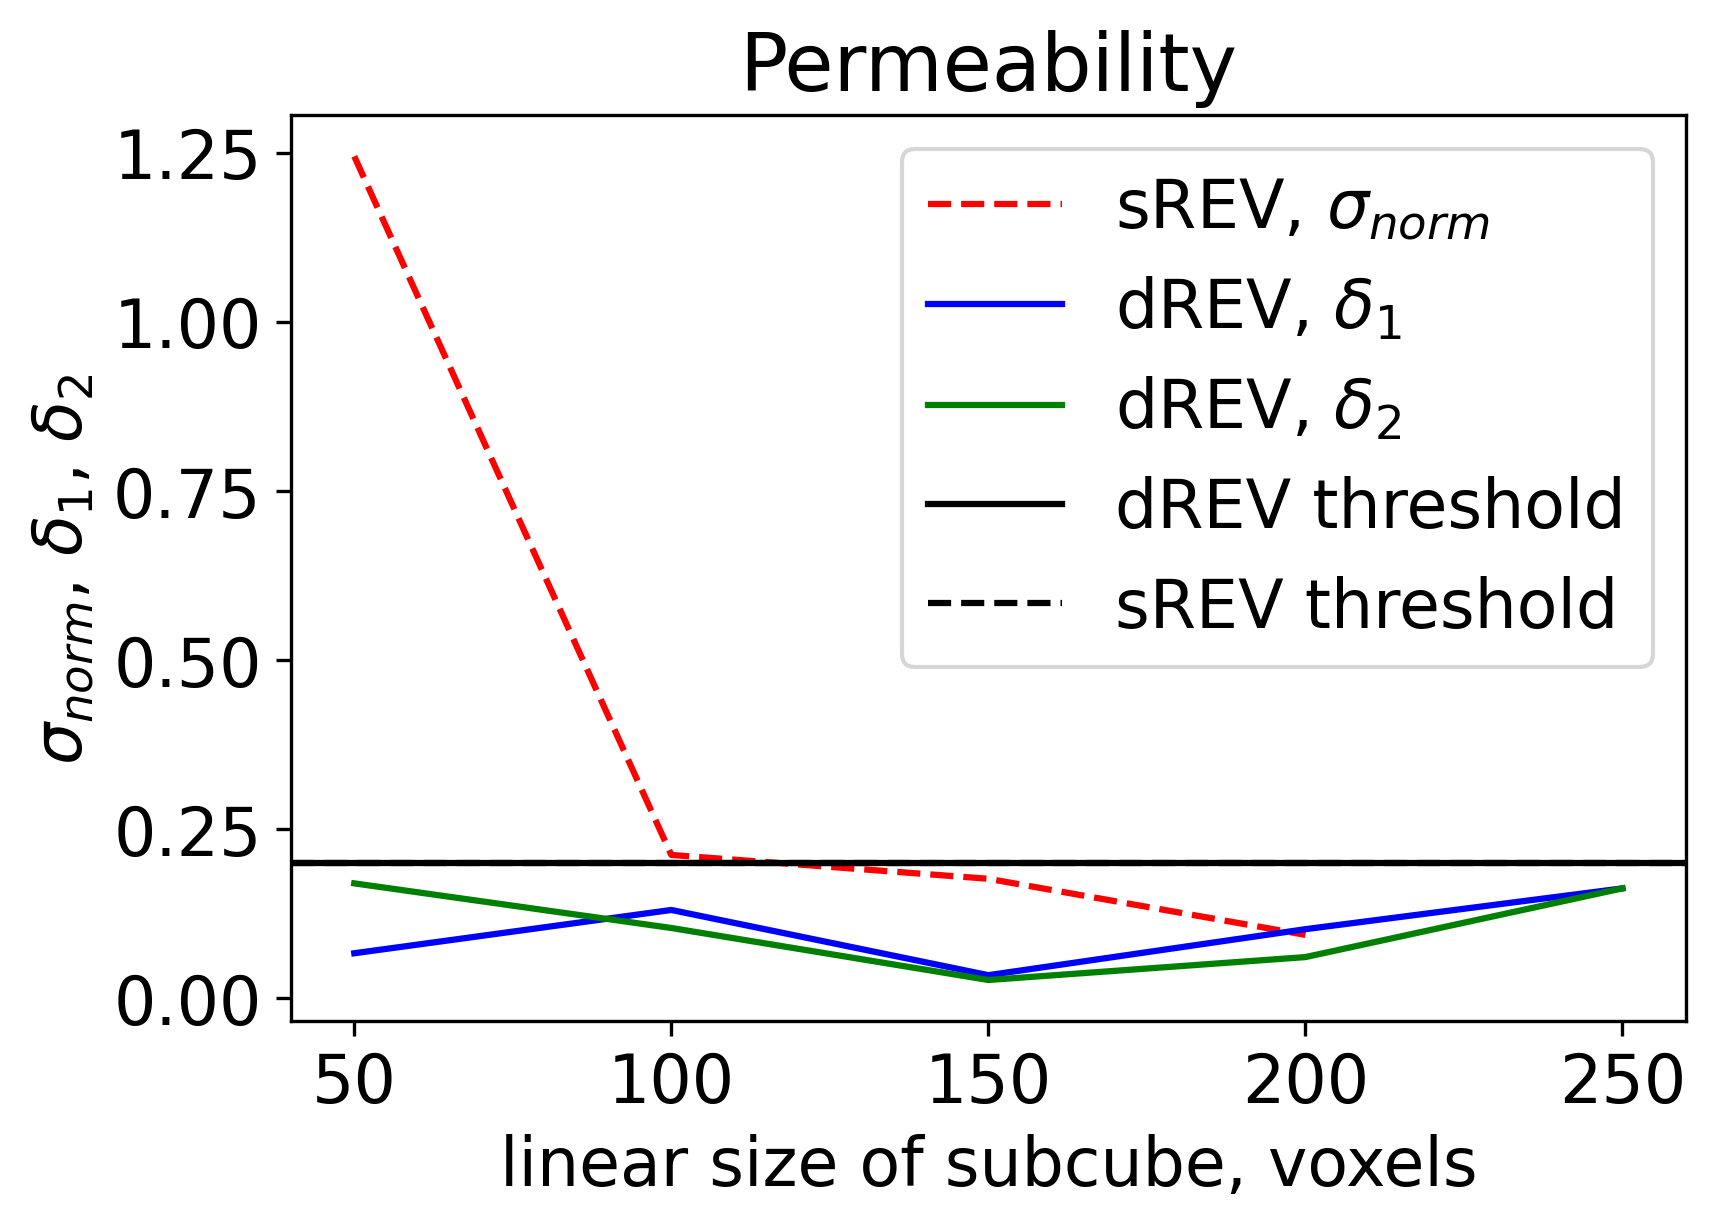

In [7]:
analyzer.show_results()